In [1]:
#1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

In [17]:
# 이미지 파일 이름 변경
import os

image_dir = "image" 
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]


for idx, image_file in enumerate(image_files):
    old_path = os.path.join(image_dir, image_file)
    extension = os.path.splitext(image_file)[1]
    new_name = f"{idx + 1}{extension}"
    new_path = os.path.join(image_dir, new_name)
    
    os.rename(old_path, new_path)

print("변경했어요")

변경했어요


124 335 3


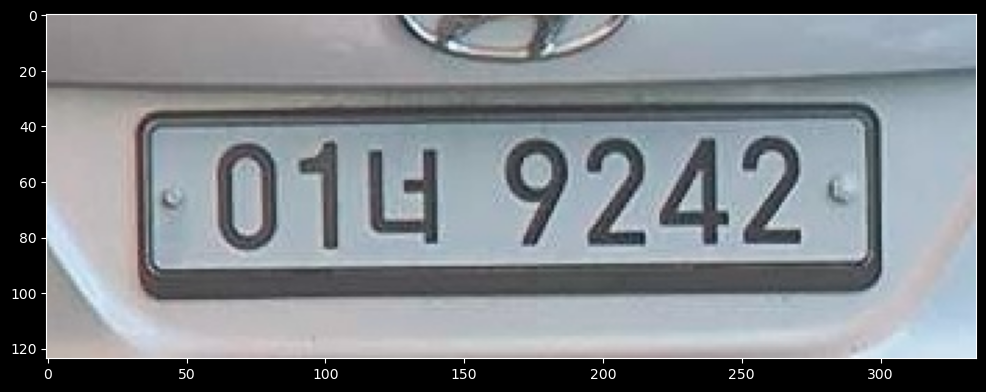

In [6]:
#2
# 이미지 파일을 읽어옵니다.
img_ori = cv2.imread('./image/97.jpg')

# 이미지의 높이, 너비 및 채널 수를 확인합니다.
height, width, channel = img_ori.shape

# 시각화를 위한 Matplotlib 플롯을 생성합니다.
plt.figure(figsize=(12, 10))

# 이미지를 시각화합니다. 'cmap' 매개변수를 'gray'로 설정하여 이미지를 그레이스케일로 표시합니다.
plt.imshow(img_ori, cmap='gray')

# 이미지의 높이, 너비, 채널 수를 출력합니다.
print(height, width, channel)

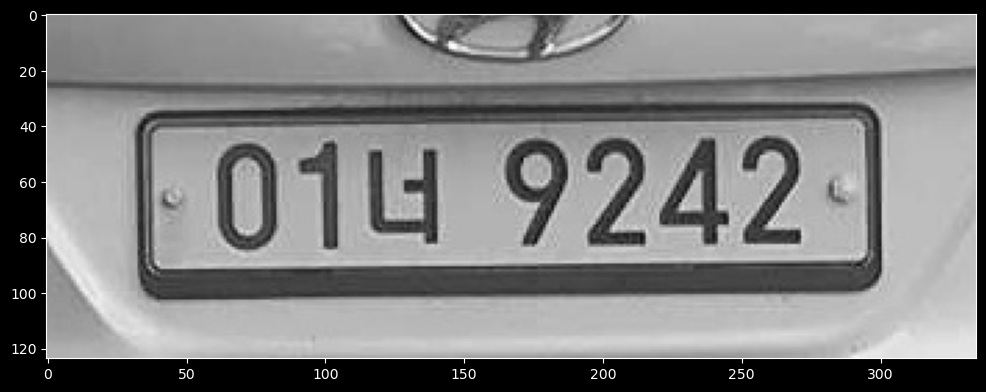

In [7]:
#3
# 원본 이미지를 BGR 색공간에서 그레이스케일 색공간으로 변환합니다.
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)

# 시각화를 위한 Matplotlib 플롯을 생성합니다.
plt.figure(figsize=(12, 10))

# 그레이스케일 이미지를 시각화합니다. 'cmap' 매개변수를 'gray'로 설정하여 이미지를 그레이스케일로 표시합니다.
plt.imshow(gray, cmap='gray')

In [8]:
#4-1
# 그레이스케일 이미지를 이진화하기 위한 적응 임계값 처리를 수행합니다.
img_thresh = cv2.adaptiveThreshold(
    gray,  # 입력 이미지 (그레이스케일)
    maxValue=255.0,  # 픽셀 값이 임계값을 넘을 때 사용되는 최대 값
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 적응 임계값 처리 방법 (가우시안 평균)
    thresholdType=cv2.THRESH_BINARY_INV,  # 임계값 처리 유형 (이진화 및 반전)
    blockSize=19,  # 임계값을 계산하는 데 사용되는 블록 크기
    C=9  # 블록 내부의 평균에서 빼는 상수
)

In [9]:
#4-2
# 그레이스케일 이미지에 가우시안 블러 필터를 적용합니다.
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

# 가우시안 블러 처리된 이미지에 적응 임계값 처리를 수행합니다.
img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,  # 입력 이미지 (가우시안 블러 처리된 그레이스케일 이미지)
    maxValue=255.0,  # 픽셀 값이 임계값을 넘을 때 사용되는 최대 값
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 적응 임계값 처리 방법 (가우시안 평균)
    thresholdType=cv2.THRESH_BINARY_INV,  # 임계값 처리 유형 (이진화 및 반전)
    blockSize=19,  # 임계값을 계산하는 데 사용되는 블록 크기
    C=9  # 블록 내부의 평균에서 빼는 상수
)

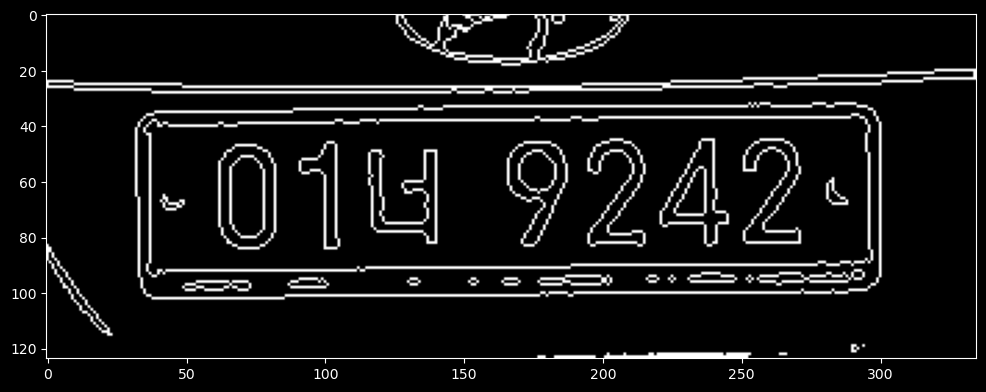

In [10]:
#5
# 이미지에서 이진화된 이미지(img_blur_thresh)로부터 윤곽선을 찾아냅니다.
contours, _ = cv2.findContours(
    img_blur_thresh,  # 입력 이미지 (이진화된 이미지)
    mode=cv2.RETR_LIST,  # 윤곽선 검색 모드 (모든 윤곽선을 찾음)
    method=cv2.CHAIN_APPROX_SIMPLE  # 윤곽선 근사화 방법 (간단한 근사화 사용)
)

# 빈 화면(temp_result)을 생성합니다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 찾아낸 모든 윤곽선을 흰색으로 그려서 temp_result 이미지에 저장합니다.
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

# 시각화를 위한 Matplotlib 플롯을 생성합니다.
plt.figure(figsize=(12, 10))

# temp_result 이미지를 시각화합니다.
plt.imshow(temp_result)

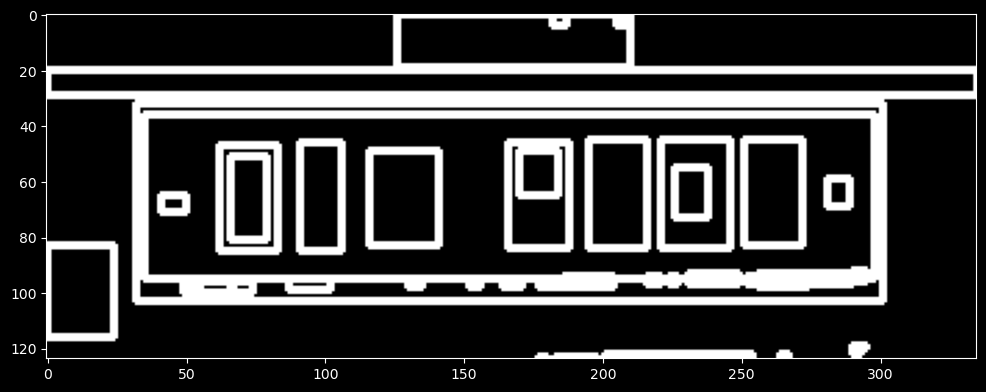

In [11]:
#6
# 빈 화면(temp_result)을 생성합니다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 각 윤곽선에 대한 정보를 저장할 리스트를 초기화합니다.
contours_dict = []

# 모든 윤곽선에 대해 반복합니다.
for contour in contours:
    # 윤곽선을 감싸는 바운딩 박스의 좌표와 크기를 찾습니다.
    x, y, w, h = cv2.boundingRect(contour)
    
    # temp_result 이미지에 바운딩 박스를 그립니다.
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=2)
    
    # 윤곽선과 관련 정보를 contours_dict 리스트에 저장합니다.
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),  # 바운딩 박스 중심의 x 좌표
        'cy': y + (h / 2)   # 바운딩 박스 중심의 y 좌표
    })
    
# 시각화를 위한 Matplotlib 플롯을 생성합니다.
plt.figure(figsize=(12, 10))

# temp_result 이미지를 시각화합니다. 'cmap' 매개변수를 'gray'로 설정하여 이미지를 그레이스케일로 표시합니다.
plt.imshow(temp_result, cmap='gray')

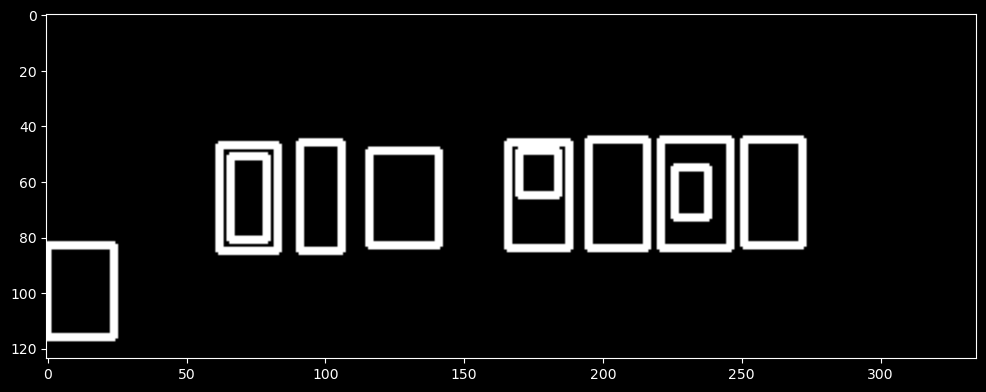

In [12]:
#7
# 바운딩 박스가 유력한 후보가 될 조건을 설정합니다.
MIN_AREA = 80  # 바운딩 박스의 면적 최솟값
MIN_WIDTH, MIN_HEIGHT = 2, 8  # 바운딩 박스의 너비와 높이 최솟값
MIN_RATIO, MAX_RATIO = 0.25, 1.0  # 바운딩 박스의 가로 세로 비율 범위

# 가능성 있는 바운딩 박스를 저장할 리스트를 초기화합니다.
possible_contours = []

# 바운딩 박스에 인덱스를 부여하기 위한 카운터 초기화
cnt = 0

# 모든 윤곽선에 대해 반복합니다.
for d in contours_dict:
    area = d['w'] * d['h']  # 바운딩 박스의 면적 계산
    ratio = d['w'] / d['h']  # 바운딩 박스의 가로 세로 비율 계산
    
    # 바운딩 박스가 유력한 후보가 될 조건을 검사합니다.
    if area > MIN_AREA \
       and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
       and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt  # 바운딩 박스에 인덱스 할당
        cnt += 1  # 인덱스 카운터 증가
        possible_contours.append(d)  # 가능성 있는 바운딩 박스를 리스트에 추가

# 결과를 저장할 빈 화면을 생성합니다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

# 가능성 있는 바운딩 박스를 시각화하기 위해 빈 화면에 그립니다.
for d in possible_contours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']), color=(255, 255, 255), thickness=2)

# 시각화를 위한 Matplotlib 플롯을 생성합니다.
plt.figure(figsize=(12, 10))

# temp_result 이미지를 시각화합니다. 'cmap' 매개변수를 'gray'로 설정하여 이미지를 그레이스케일로 표시합니다.
plt.imshow(temp_result, cmap='gray')

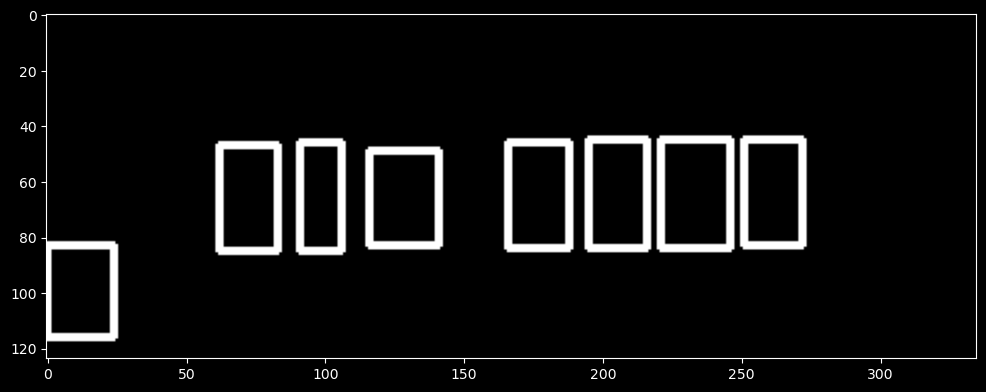

In [13]:
#8
MAX_DIAG_MULTIPLYER = 5
MAX_ANGLE_DIFF = 12.0
MAX_AREA_DIFF = 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3

def find_chars(contour_list):
    matched_result_idx = []
    
    # 모든 윤곽선을 반복적으로 비교하여 유효한 문자로 간주되는 문자 윤곽선을 찾습니다.
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue
                
            # 두 문자 윤곽선 간의 거리, 각도 및 크기 차이를 계산합니다.
            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])
            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)
            
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']
            
            # 거리, 각도 및 크기 차이가 일정 범위 내에 있는 경우 유효한 문자로 간주합니다.
            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])
                
        # 자기 자신의 윤곽선을 추가하고, 특정 조건을 충족하는 윤곽선을 모읍니다.
        matched_contours_idx.append(d1['idx'])
        
        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue
            
        # 유효한 문자로 인식된 윤곽선을 저장합니다.
        matched_result_idx.append(matched_contours_idx)
        
        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])
        
        # 유효하지 않은 문자로 인식된 윤곽선을 모읍니다.
        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # 재귀적으로 유효한 문자로 인식된 윤곽선을 찾습니다.
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)
            
        break
        
    return matched_result_idx

# 문자로 인식된 윤곽선을 찾습니다.
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
    
# 인식된 문자 윤곽선에 흰색 사각형을 그려 시각화합니다.
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255,255,255), thickness=2)

# Matplotlib을 사용하여 결과 이미지를 시각화합니다.
plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')


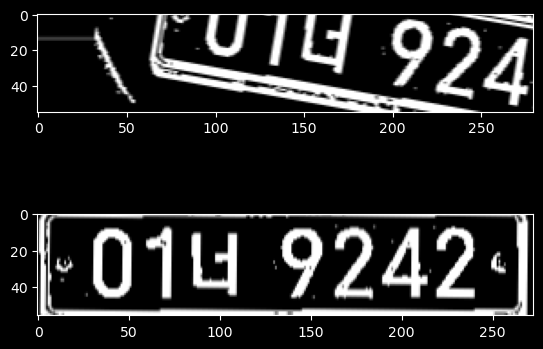

In [14]:
#9
# PLATE_WIDTH_PADDING 및 PLATE_HEIGHT_PADDING 파라미터는 번호판의 너비와 높이를 조절하는 상수입니다.
PLATE_WIDTH_PADDING = 1.3
PLATE_HEIGHT_PADDING = 1.5

# MIN_PLATE_RATIO 및 MAX_PLATE_RATIO 파라미터는 번호판의 가로세로 비율 범위를 지정하는 상수입니다.
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

# 추출된 번호판 이미지들을 저장할 리스트 및 번호판 정보를 저장할 리스트를 초기화합니다.
plate_imgs = []
plate_infos = []

# matched_result에는 문자 영역으로 판단된 윤곽선들의 리스트가 있습니다. 이를 순회하며 번호판 이미지 추출을 수행합니다.
for i, matched_chars in enumerate(matched_result):
    # 문자 영역들을 x 좌표를 기준으로 정렬합니다.
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    # 번호판의 중심점 좌표를 계산합니다.
    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2

    # 번호판의 너비를 계산합니다.
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING

    # 문자 영역의 평균 높이를 계산하여 번호판의 높이를 결정합니다.
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']
    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)

    # 번호판의 기울기를 계산합니다.
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenuse = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) -
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenuse))

    # 번호판의 회전 행렬을 계산합니다.
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)

    # 이미지를 회전하고 번호판 부분만 잘라냅니다.
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    img_cropped = cv2.getRectSubPix(
        img_rotated,
        patchSize=(int(plate_width), int(plate_height)),
        center=(int(plate_cx), int(plate_cy))
    )

    # 번호판의 가로세로 비율이 범위 내에 있는지 확인합니다.
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] > MAX_PLATE_RATIO:
        continue

    # 추출된 번호판 이미지와 정보를 리스트에 추가합니다.
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })

    # Matplotlib을 사용하여 추출된 번호판 이미지를 시각화합니다.
    plt.subplot(len(matched_result), 1, i + 1)
    plt.imshow(img_cropped, cmap='gray')

쁠펠빛2흐큭
이너9242


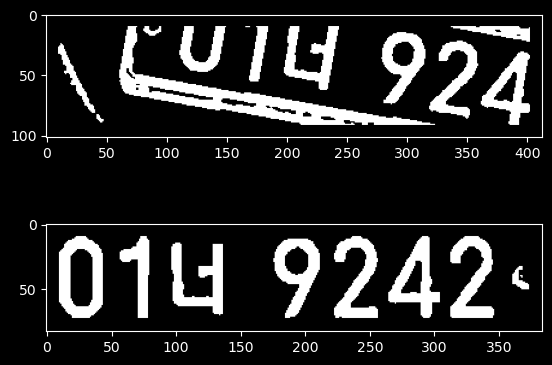

In [15]:
#10
# 초기값 설정
longest_idx, longest_text = -1, 0
plate_chars = []

# 추출된 번호판 이미지를 순회합니다.
for i, plate_img in enumerate(plate_imgs):
    # 번호판 이미지 크기를 확대합니다.
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    
    # 이진화 처리를 수행합니다.
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # 문자 영역을 찾습니다.
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    # 번호판 영역을 초기화합니다.
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
    
    # 번호판 이미지에서 글자 영역만 추출합니다.
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    # 이미지를 블러 처리합니다.
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    
    # 이미지를 다시 이진화 처리합니다.
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # 이미지 주변에 패딩을 추가합니다.
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    
    # Tesseract OCR 설정
    pytesseract.pytesseract.tesseract_cmd = 'D:/tesseract/tesseract.exe'
    
    # 이미지에서 문자를 인식합니다.
    chars = pytesseract.image_to_string(img_result, lang='kor', config='--psm 7 --oem 0')
    
    # 인식된 문자 중에서 한글과 숫자만 추출합니다.
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    # 인식된 문자열을 출력합니다.
    print(result_chars)
    plate_chars.append(result_chars)

    # 인식된 문자열 중에서 숫자가 포함되어 있고, 가장 긴 문자열을 찾습니다.
    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    # Matplotlib을 사용하여 인식 결과를 시각화합니다.
    plt.subplot(len(plate_imgs), 1, i + 1)
    plt.imshow(img_result, cmap='gray')

이너9242


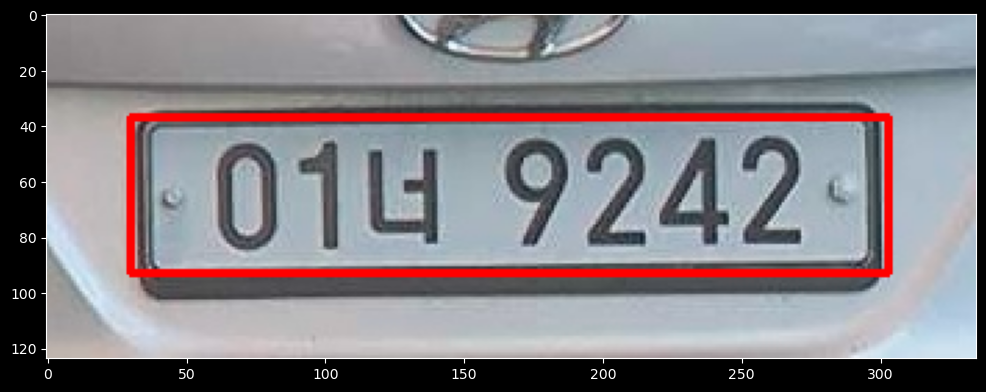

In [16]:
#11
# 가장 가능성 있는 번호판 정보를 선택합니다.
info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

# 인식된 문자열을 출력합니다.
print(chars)

# 원본 이미지를 복사합니다.
img_out = img_ori.copy()

# 가장 가능성 있는 번호판의 위치에 파란색 테두리를 그립니다.
cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

# 가장 가능성 있는 번호판 이미지를 저장합니다. 파일 이름은 인식된 문자열로 지정됩니다.
cv2.imwrite(chars + '.jpg', img_out)

# Matplotlib을 사용하여 결과 이미지를 시각화합니다.
plt.figure(figsize=(12, 10))
plt.imshow(img_out)